# Лабораторная работа 1
# Задача о падении тела. Построение графиков функций


Горбачевский Илья Александрович, 20.02.2025

## Задание 1.1. Задача о падении тела

**Описание процесса**.
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через
время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и
высоте $h_{end}$. 

**Предположения**.
- Тело будем считать материальной точкой массы $m$.
- Движение запущенного тела осуществляется только под действием силы
тяжести $${\bf F} = m (0,-g),$$ где $m$ -- масса тела, $g$ -- ускорение
свободного падения.
- Сопротивлением среды пренебрегаем.


**Данные**. 
- Задача рассматривается при следующих значениях параметров: $h_{start}$ = 1 m, $h_{end}$ = 3 m, *T* = 3 s, $s_{end}$ = 5 m. 
- Угол запуска тела $\alpha$ не известен. 
- Начальный момент времени движения тела полагаем равным нулю: *t* = 0 
- Значение массы тела т не повлияет на функции перемещения тела.

## Выполнение Задания 1.1

### Этап 1. Импортирование модулей


Импортируем модуль math с математическими функциями из стандартной
библиотеки:

In [2]:
import math

In [3]:
%conda install numpy -y

Retrieving notices: done
Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Доступ к инструментам модуля осуществляется с применением синтаксиса
уточнения `<имя модуля>.<имя атрибута>` .Например,

In [4]:
math.sin(math.pi/2)


1.0

Импортируем расширение `numpy` и создадим псевдоним `np` для доступа к
инструментам модуля, не используя имя `numpy`

In [5]:
import numpy as np 


Расширение `numpy` основано на работе со структурой данных массив (` ndarray `).
Массив (` ndarray `) не является встроенным типом данных Python, он является
базовым типом расширения `numpy` .

Импортируем модуль `pyplot` из пакета `matplotlib` для построения графиков.
Для этого примененим синтаксис `<имя пакета>.<имя модуля в пакете>` и
создадим псевдоним имени модуля `plt`


In [6]:
%conda install matplotlib -y

Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib.pyplot as plt

Импортируем модуль `constants` из пакета расширений `scipy` с псевдонимом
`const` . Модуль `constants` предоставляет доступ к значениям физических
констант

In [8]:
%conda install scipy -y

Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [9]:
import scipy.constants as const

Импортируем модуль `sympy` для символьных вычислений в Python

In [10]:
%conda install sympy -y

Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [11]:
%conda list sympy

# packages in environment at /home/amogus/miniconda3/envs/clean_env:
#
# Name                    Version                   Build  Channel
sympy                     1.13.3          py313h06a4308_1  

Note: you may need to restart the kernel to use updated packages.


In [12]:
!which python

/home/amogus/miniconda3/envs/clean_env/bin/python


In [13]:
import sympy # type: ignore

## Этап 2. Создание переменных

**Переменные** создаются при первом присваивании им значений. Слева от
оператора присваивания (` = `) записывается переменная, справа — выражение,
результатом вычисления которого является объект: `переменная = объект` . Имена
переменных рекомендовано задавать в нижнем регистре с использованием знака
нижнего подчеркивания для смыслового разделения имени на части, например
`first_variable = 1` . Объявлять переменные перед их инициализацией не нужно.

После присваивания всякий раз, когда переменная появляется в коде, она
заменяется на объект, на который ссылается. Нельзя использовать переменную,
которой не присвоено значение.

In [14]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета

Отобразить значение переменной можно, указав ее имя в ячейке ввода в
последней строке или с использованием встроенной функции `print`


In [15]:
h_start # переменная не отобразится
h_end # переменная отобразится

3.0

In [16]:
print(h_start, h_end)

1 3.0


Определим значение ускорения свободного падения для дальнейших расчетов:


In [17]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

$\color{red}\text{Приведите}$ несколько примеров физических констант из модуля
`constants` пакета расширений `scipy` .

Временной отрезок [0, *T*] представим в виде последовательности чисел. Cоздадим
последовательность равномерно распределенных чисел на отрезке [0, *T*] с шагом
0.01 двумя способами: на основе встроенного типа список (* list *) и на основе
массива (* ndarray *) из расширения `numpy`

In [18]:
from scipy.constants import c
print(c, "м/с")

299792458.0 м/с


In [19]:
from scipy.constants import h
print(h, "Дж·с")

6.62607015e-34 Дж·с


In [20]:
from scipy.constants import pi
print(pi)

3.141592653589793


In [21]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/step))]
t_array = np.arange(0,T,step)

$\color{red}\text{Сформулируйте}$ спецификации функций `range` и `arange` ,
приведите примеры.


### *Спецификация range и arange:* 

Функция `range` встроена в Python и используется для создания последовательности целых чисел. Она возвращает объект типа `range`, который является итерируемым: 

In [67]:
print(list(range(15)))
print(list(range(1, 15, 2)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[1, 3, 5, 7, 9, 11, 13]


`range(start, stop, step)`

- start (опционально): Начальное значение последовательности (по умолчанию 0).

- stop: Конечное значение последовательности (не включается в результат).

- step (опционально): Шаг последовательности (по умолчанию 1).

#### **Примеры:**
- Создание последовательности от 0 до 4:

In [26]:
for i in range(5):
    print(i)

0
1
2
3
4


- Создание последовательности от 2 до 8 с шагом 2:

In [27]:
for i in range(2, 9, 2):
    print(i)

2
4
6
8


- Преобразование range в список:

In [28]:
numbers = list(range(1, 6))
print(numbers)

[1, 2, 3, 4, 5]


Функция arange принадлежит библиотеке numpy и используется для создания массивов чисел с возможностью указания шага и типа данных.

`numpy.arange(start, stop, step, dtype=None)`

- start (опционально): Начальное значение последовательности (по умолчанию 0).

- stop: Конечное значение последовательности (не включается в результат).

- step (опционально): Шаг последовательности (по умолчанию 1).

- dtype (опционально): Тип данных элементов массива (например, int, float).

#### **Примеры:**
- Создание массива от 0 до 4:

In [29]:
import numpy as np
arr = np.arange(5)
print(arr)

[0 1 2 3 4]


- Создание массива от 1.5 до 5.5 с шагом 0.5:

In [30]:
import numpy as np
arr = np.arange(1.5, 5.5, 0.5)
print(arr)

[1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


- Создание массива с типом данных float:

In [ ]:
arr = np.arange(0, 5, 1, dtype=float)
print(arr)

[0. 1. 2. 3. 4.]


In [70]:
arr = np.arange(0.,5,1)
print(arr)

[0. 1. 2. 3. 4.]


Основные различия между range и arange:
1) Библиотека:

- range — встроенная функция Python.

- arange — функция из библиотеки numpy.

2) Тип возвращаемого значения:

- range возвращает объект типа range (итерируемый).

- arange возвращает массив numpy.ndarray.

3) Поддержка типов данных:

- range работает только с целыми числами.

- arange поддерживает различные типы данных (например, float).

4) Использование:

- range обычно используется в циклах и для создания последовательностей целых чисел.

- arange используется для создания массивов чисел, особенно в научных вычислениях.

Запомните, что после создания списка (` list `) его размер изменить можно, после
создания массива (` ndarray `) его размер изменить нельзя.

## Этап 3. Определение функции перемещения и нахождение угла запуска тела

Полагаем, что начало прямоугольной декартовой системы координат соответствует
уровню земли. Тогда в начальный момент движения тела *t* = 0 имеем, что 


$$s_{x}(0) = 0, s_{y}(0) = h_{start}$$


Для построения функции перемещения $(s_{x}(t), s_{y}(t))$ воспользуемся вторым законом Ньютона

$$m{\bf a} = {\bf F}, $$

где m — масса тела, ускорение движения тела ${\bf a}$ = ($s''_{x}(t)$, $s''_{y}(t)$) и приложенная ${\bf F} = m (0,-g)$. В результате имеем два уравнения, что


$$s''_{t} = 0, s''_{t} = -g.$$

На основании уравнений с учетом начальных условий можно записать
аналитический вид для функций $s_{x}(t)$  и  $s_{y}(t)$

$$s_{x}(t) = s_{x}(0) + v0_{x}(t) = 0 + v0_{x}(t), $$

$$s_{y}(t) = s_{y}(0) + v0_{x}(t) - g\frac{t^{2}}{2} = h_{start} + v0_{y}(t) - g\frac{t^{2}}{2}, $$

где ${\bf V0}$ = $(v0_{x}, v0_{y})$ обозначает неизвестную скорость движения тела в начальный
момент времени *t* = 0

$\color{red}\text{Напишите}$ подробно, как из второго закона Ньютона и начальных
условий получен аналитический вид функции перемещения $(s_{x}(t), s_{y}(t))$.
Объяснения оформите в тексте документа с лабораторной работой.

Рассмотрим подробно, как из второго закона Ньютона и начальных условий получаются аналитические выражения для функций перемещения ${s_{x}(t)}$ и ${s_{y}(t)}$. Второй закон Ньютона утверждает, что ускорение тела *a* связано с силой *F*, действующей на тело, и его массой *m*: 
$$ m{\bf a} = {\bf F}, $$
В случае свободного падения тела на него действует сила тяжести ${\bf F} = m {\bf g}$, где g = (0,-g) - ускорение свободного падения (направлено вниз по оси y).

Ускорение — это вторая производная перемещения по времени. Движение равномерное по оси X, так как ускорение отсутствует (${a_x} = 0$). Перемещение линейно зависит от времени.

По оси Y движение равноускоренное под действием силы тяжести. Перемещение зависит от времени квадратично.

$\color{red}\text{Задание* необязательно}$ как изменится вид функций перемещения, если начальный момент времени будет равен не *t* = 0, а *t* = *t**?

Если начальный момент времени *t* = 0 смещается на *t* = *t**, то уравнения для перемещения тела по осям *х* и *у* изменятся следующим образом:
- Перемещение по оси Х:
$$s_{x}(t) = s_{x}(t^{*}) + v0_{x}(t - t^{*})$$
- Перемещение по оси Y:
$$s_{y}(t) = s_{y}(t^{*}) + v0_{x}(t - t^{*}) - g\frac{(t - t^{*})^{2}}{2} $$

Из условия задачи имеем, что $s_{x}(T) = s_{end}$. Из этого соотношения находим
значение для $v0_{x}$

In [32]:
v0_x = s_end/T
v0_x

1.6666666666666667

Из условия задачи имеем, что $s_{y}(T) = h_{end}$. Из этого соотношения находим
значение для $v0_{y}$

In [33]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

Значение угла запуска тела $\alpha$ определяем из соотношения tan $\alpha = \frac{v0_{y}}{v0_{x}}$

In [34]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

Результирующая функция перемещения имеет следующий вид

In [35]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [36]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'


's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

## Этап 4. Построение графика траектории движения тела

Построение графиков функций осуществляется по координатам точек графика. Для
этого нужно создать последовательность значений *x*-координат точек графика функции и последовательность соответствующих значений *y*-координат точек графика функции.

На Этапе 2 было создано две последовательности равномерно распределенных
чисел на отрезке [0, *T*] с шагом 0.01 для переменной времени *t*

In [37]:
t_list, t_array;

Определим списки чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в моменты времени `t_list` с использованием
формул, полученных на Этапе 3:

In [38]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Определим массивы чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в момент времени `t_array `:


In [39]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

Обратите внимание, что арифметические действия (+,-, *,/, **) с массивами
`ndarray` выполняются **поэлементно** без использования дополнительного
синтаксиса.


Строим график траектории движения тела, используя инструменты модуля `pyplot`
пакета `matplotlib` . Смотрите **Help | Matplotlib Reference** для справочной
информации по используемым функциям: `figure` , `plot` , `title` , `xlabel` ,
`ylabel` , `axis` , `xlim` , `ylim` .

(np.float64(0.0), np.float64(5.0), np.float64(0.0), np.float64(14.0))

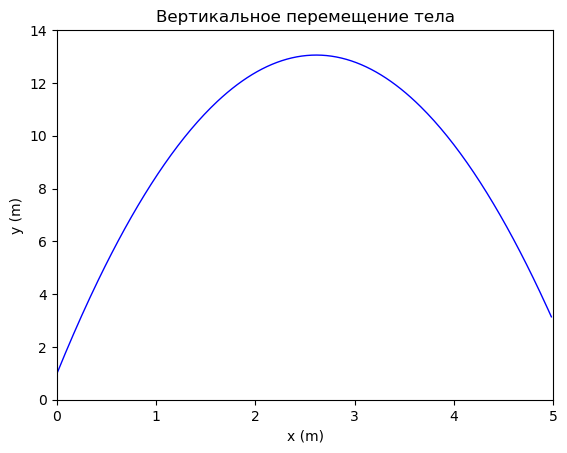

In [73]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=1)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') 
plt.axis([0, s_end, 0, h_end+11])

При вызове функции `plot` из `pyplot` можно использовать как списки, так и
массивы.

(0.0, 14.0)

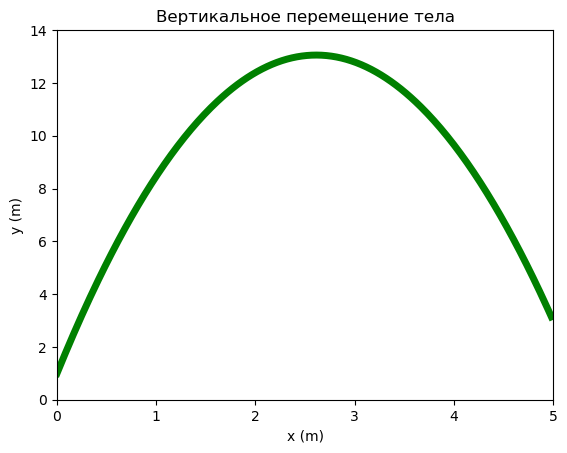

In [72]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11)

## Задание 1.2. Определение момента времени касания телом земли

## Выполнение Задания 1.2

Рассмотрим *Подход 1* выполнения Задания 1.2.


Для решения алгебраического уравнения $s_{y}(t) = 0$ воспользуемся функцией
`solve` из модуля `sympy` , которая предназначена для решения алгебраических
уравнений и систем уравнений. Для выполнения функции `solve` предварительно с
помощью функции `symbols` необходимо создать **символьную переменную**,
относительно которой будет определено уравнение.


In [42]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [43]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

$\color{red}\text{Сформулируйте}$
спецификации функций `symbols` и `solve` из
модуля `sympy` . $\color{red}\text{Приведите}$ два собственных примера решения
алгебраических уравнений

### *Спецификация symbol и solve:* 

Функция `symbols` используется для создания символьных переменных, которые могут быть использованы в символьных вычислениях.

$$sympy.symbols(symbols, **args)$$

- `symbols`: Строка, содержащая имена переменных, разделенных пробелами или запятыми.

- `**args`: Дополнительные аргументы, которые могут быть переданы для настройки поведения функции.

- Возвращает кортеж символьных переменных, соответствующих именам, переданным в `symbols`.

Функция `solve` используется для решения алгебраических уравнений.

$$sympy.solve(f, *symbols, **flags)$$

- `f`: Уравнение или сис-ма уравнений

- `*symbols`: Символы, относительно которых нужно решить уравнение.

- `**flags`: Дополнительные флаги

- Возвращает список решений уравнения или системы уравнений.

#### *Примеры решения алгебраических уравнений*

- Решение линейного уравнения

In [79]:
x = sp.symbols('x')
equation = 1/2*(x-2)+1
solution = sp.solve(equation, x)
solution

[0.0]

- Решение квадратного уравнения

In [80]:
x = sp.symbols('x')
equation = x**2 - 5*x + 6
solution = sp.solve(equation, x)
solution

[2, 3]

Функции `symbols` и `solve` из sympy помогают просто решать уравнения и системы

## Задание 1.3. Построение секущей, касательной и нормали к графику функции

## Выполнение Задания 1.3

Подготовим необходимые данные для построения секущей прямой к траектории
движения тела.

Воспользуемся векторно-параметрическим уравнением прямой для заданной точки $p_{start}$ лежащей на прямой, и заданного направляющего вектора *a* $$p(t) = p_{start} + at.$$

Направляющий вектор можно определить как *a* = $p_{end} - p_{end}$, где точка $p_{end}$ лежит на прямой и отлична от точки $p_{start}$

Введем новые переменные для описания начальной точки $p_{start}$ и конечной точки $p_{end}$ через их координаты. Для новых переменных используем тип массив
(` ndarray `) из `numpy` . Представление координат точек в виде массивов иногда
эффективнее, чем представление в виде списков, для дальнейшей работы с
координатами.

In [46]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

Вычислим направляющий вектор:

In [47]:
a = p_end-p_start

Для построения графика прямой достаточно задания двух точек, лежащих на
прямой:

In [48]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной
графической области:

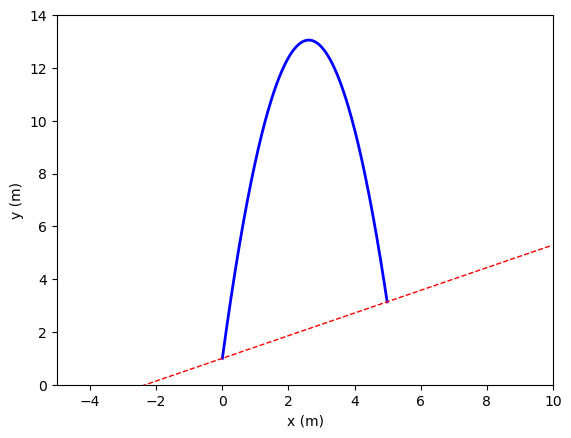

In [81]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=2)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);

$\color{red}\text{Постройте}$ график касательной прямой к траектории движения
тела в одной графической области с траекторией движения и секущей прямой. Для
построения касательной прямой воспользуйтесь уравнением прямой по точке $p_{start} (x_{start}, y_{start})$ и угловому коэффициенту k: 


In [82]:
import numpy as np
import matplotlib.pyplot as plt

t0 = 1.6
x0 = v0_x * t0
y0 = h_start + v0_y * t0 - g * t0**2 / 2

k = (v0_y - g * t0) / v0_x

# y = k*(x - x0) + y0
x_tangent = np.linspace(x0 - 1, x0 + 1, 100)
y_tangent = k * (x_tangent - x0) + y0

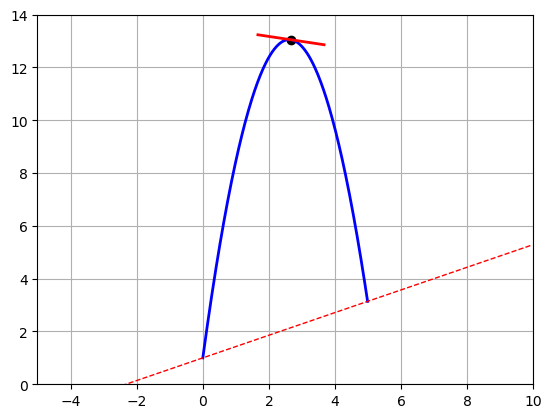

In [90]:
plt.plot(s_x_array, s_y_array, 'b-', lw=2)
plt.plot(x_tangent, y_tangent, 'r', lw=2)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.scatter([x0], [y0], color='black')
plt.grid()
plt.axis([-5, s_end+5, 0, h_end+11])
plt.show()

Угловой коэффициент *k* касательной к графику функции *y(t)* в точке *t* = $t_{0}$ равен производной в этой точке

In [ ]:
k_normal = -v0_x / v0_y  
x_normal = np.linspace(-1, 1, 100)  
y_normal = k_normal * x_normal + h_start  

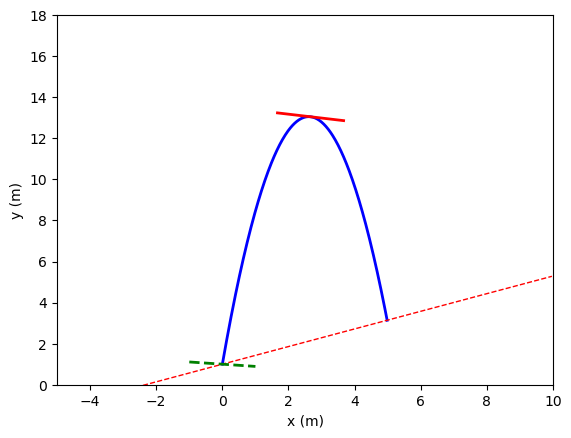

In [91]:
plt.figure()
plt.plot(s_x_list, s_y_list, 'b-', lw=2)
plt.plot(x_tangent, y_tangent, 'r', lw=2)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.plot(x_normal, y_normal, 'g--', lw=2)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+15])
plt.show()

Чтобы построить нормальную прямую к траектории движения тела в момент времени *t* = 0, воспользуемся свойством перпендикулярности касательной и нормальной прямых. Нормальная прямая перпендикулярна касательной, и её угловой коэффициент $k_{n}$ связан с угловым коэффициентом касательной *k* следующим соотношением: $$k_{n} = -\frac{1}{k}$$

Таким образом в момент времени *t* = 0 угловой коэффициент k вычисляется так: $$k = \frac{v0_{y}}{v0_{x}}$$

Используя соотношение, полученное ранее, можно получить соотношение для коэффициента нормали $k_{n}$: $$k_{n} = - \frac{v0_{x}}{v0_{y}}$$

## Задание 1.4. Построение графиков функций


$\color{red}\text{Постройте}$ графики функций на плоскости по координатам точек
согласно варианту. Функция задана:
- а) полярным уравнением *ρ = ρ(φ)* в полярной системе координат *(ρ,φ)*;
- б) параметрическими уравнениями *x = x(t)*, *y = y(t)* в декартовой системе
координат *(x,y)*

Построение графиков функций осуществляется по координатам точек графика. Для
этого нужно создать последовательность значений *x(φ)*-координат точек графика
функции и последовательность соответствующих значений *y(ρ)*-координат точек
графика функции.
 

## Вариант 6

#### *пункт а)*

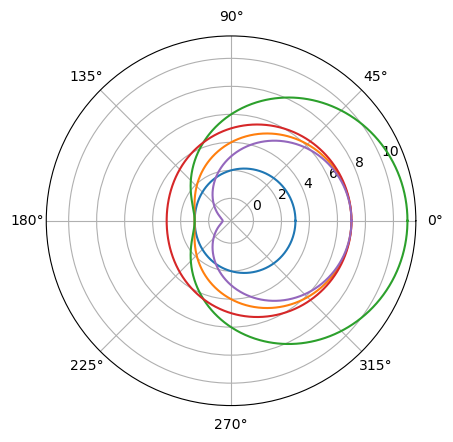

In [95]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.axes(projection='polar')
phi = np.linspace(0, 2*np.pi, 1000)
snail_params = [
    (1, 2),
    (3, 4),
    (5, 6),
    (2, 5),
    (4, 3)
]
for a,b in snail_params:
    r = a*np.cos(phi)+b
    plt.plot(phi,r);




#### *пункт б)*

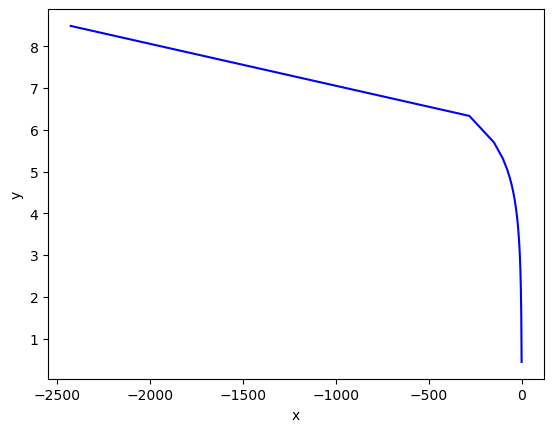

In [55]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,1,1000)
et = np.exp(t)
tan_et = np.tan(et)
mask = tan_et > 0
x = 1 / np.tan(2*et[mask])
y = np.log(tan_et[mask])
plt.figure()
plt.plot(x, y, 'b-', label='График параметрических уравнений')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Контрольные вопросы

### ЛБ01 Часть 1. Введение в язык программирования Python

#### 1. Основатель языка Python, история создания и текущие позиции в рейтинге

#### 2. Преимущества языка Python

#### 3. Поддержка нескольких парадигм программирования

#### 4. Интерпретируемый язык программирования

#### 5. Основной недостаток Python

#### 6. Области применения и известные продукты

#### 7. Структура программы на Python

#### 8. Особенности синтаксиса Python

#### 9. PEP 8

#### 10. JupyterLab — свободное ПО с открытым кодом

### ЛБ01 Часть 2. Работа с ячейками в документе .ipynb

#### 1. Определения сущностей документа .ipynb

- Ячейка кода – это сущность документа .ipynb, которая содержит исполняемый код на Python (или другом языке), предназначена для выполнения программных инструкций, результат выполнения ячейки отображается непосредственно под ней в виде текста, графиков, таблиц или других данных.

- Ячейка редактирования (Markdown) – это сущность документа .ipynb, которая содержит текст, написанный с использованием языка разметки Markdown, предназначена для добавления пояснений, заголовков, списков, формул и других текстовых элементов, результат выполнения ячейки отображается в виде отформатированного текста.

#### 2. Действия с ячейками в командном режиме Jupyter Noteboo

В командном режиме (активируется клавишей `Esc`) можно выполнять следующие действия:

- Добавлять ячейки выше (`A`) или ниже (`B`).

- Удалять ячейку (`D`, `D`).

- Копировать (`C`), вырезать (`X`) и вставлять (`V`) ячейки.

- Перемещать ячейки вверх (`Ctrl` + `Shift` + `↑`) или вниз (`Ctrl` + `Shift` + `↓`).

- Изменять тип ячейки на Code (`Y`) или Markdown (`M`).

- Объединять ячейки (`Shift` + `M`).

- Разделять ячейку (`Ctrl` + `Shift` + `-`).

- Выделять несколько ячеек (`Shift` + `↑`/`↓`).

- Отменить последнее действие (`Z`)

#### 3. Языки разметки для форматирования текста в .ipynb

1. Markdown – используется для создания текстового контента: заголовков, списков, ссылок, изображений, формул и т.д.

2. LaTeX – используется для написания математических формул и выражений.

А) Горячие клавиши для работы с ячейками
- Сделать ячейку активной: `Enter`.

- Создать ячейку выше активной: `A` (в командном режиме).

- Создать ячейку ниже активной: `B` (в командном режиме).

- Установить тип Code: `Y` (в командном режиме).

- Установить тип Markdown: `M` (в командном режиме).

- Перевести в режим редактирования: `Enter`.

- Перевести в командный режим: `Esc`.

- Копировать ячейку: `C` (в командном режиме).

- Вставить ячейку: `V` (в командном режиме).

- Вырезать ячейку: `X` (в командном режиме).

- Удалить ячейку: `D`, `D` (в командном режиме).

- Выделить несколько ячеек: `Shift` + `↑`/`↓` (в командном режиме).

- Объединить ячейки: `Shift` + `M` (в командном режиме).

- Разделить ячейку: `Ctrl` + `Shift` + `-` (в режиме редактирования).

- Отменить последнее действие: `Z` (в командном режиме).

Б) Элементы языка Markdown для форматирования текста:
- Заголовок первого уровня:
`# Заголовок 1`

- Заголовок второго уровня:
`## Заголовок 2`

- Заголовок уровня n:
`###### Заголовок n (количество # соответствует уровню).`

- Ненумерованный список:
Используйте -, * или + перед элементом списка:
- `- Элемент 1`
- `* Элемент 2`
- `+ Элемент 3`
- Выделение текста курсивом:
*курсив* или _курсив_.

- Выделение текста жирным шрифтом:
**жирный** или __жирный__.

- Математическое выражение в строке:
Используйте одинарные доллары:
`$E = mc^2$`.

- Математическое выражение с новой строки:
Используйте двойные доллары:
`$$E = mc^2$$`.

- Отображение текста цветом:
Markdown не поддерживает цвет напрямую, но можно использовать HTML:
`<span style="color:red;">Красный текст</span>`

### ЛБ01 Часть 3. Использование некоторых модулей и расширений


#### 1. Модуль с математическими функциями

Имя модуля: `math`.

Для подключения используется команд:

In [57]:
import math

#### 2. Пример использования математической функции

Пример использования функции `sqrt` (квадратный корень) из модуля `math`:

In [ ]:
import math

result = math.sqrt(16)
print(result)

4.0


#### 3. Подключение модуля для работы с графикой и создание псевдонима

Модуль для работы с графикой: `matplotlib.pyplot`.

Для подключения с псевдонимом используется команда:

In [59]:
import matplotlib.pyplot as plt

Теперь вместо `matplotlib.pyplot` можно использовать `plt`.

#### 4. Расширение для работы с массивами

Имя расширения: `numpy`.

Оно предоставляет структуру данных массив (array) и множество функций для работы с ней.

#### 5. Модуль с физическими константами

Модуль, содержащий значения физических констант, называется `scipy.constants`. Он находится в пакете `scipy`.

In [60]:
import scipy.constants

#### 6. Определение ускорения свободного падения:

Пример определения ускорения свободного падения (`g`) с использованием модуля `scipy.constants`:

In [ ]:
import scipy.constants as const

g = const.g
print(g) 

9.80665


#### 7. Назначение модуля sympy

Модуль `sympy` предназначен для символьных вычислений. Он позволяет работать с алгебраическими выражениями, решать уравнения, дифференцировать, интегрировать и выполнять другие математические операции в символьном виде.

#### 8. Пример решения алгебраического уравнения с sympy:

Пример решения уравнения  $x^{2}$ - 4 = 0 с использованием модуля `sympy`:

In [ ]:
import sympy as sp # type: ignore

x = sp.symbols('x')

equation = sp.Eq(x**2 - 4, 0)

solution = sp.solve(equation, x)
print(solution) 

[-2, 2]


### ЛБ01 Часть 4. Использование функций графики

#### 1. Спецификация функции range:

Функция range в Python используется для генерации последовательности чисел. Она может принимать от одного до трех аргументов:

- `range(stop) `— генерирует последовательность чисел от `0` до `stop - 1` с шагом `1`.

- `range(start, stop)` — генерирует последовательность чисел от `start` до `stop - 1` с шагом `1`.

- `ange(start, stop, step)` — генерирует последовательность чисел от `start` до `stop - 1` с шагом `step`.

Примеры:

In [ ]:

for i in range(5):
    print(i, end='')

for i in range(2, 7):
    print(i, end='')

for i in range(1, 11, 2):
    print(i, end='') 

012342345613579

#### 2. Спецификация функции numpy.arange:

Функция `numpy.arange` используется для создания одномерного массива чисел с заданным диапазоном и шагом. Она аналогична `range`, но возвращает массив NumPy. Аргументы:

- `start` (необязательный) — начальное значение (по умолчанию `0`).

- `stop` — конечное значение (не включается в массив).

- `step` (необязательный) — шаг (по умолчанию `1`).

- `dtype` (необязательный) — тип данных элементов массива.

Пример:

In [ ]:
import numpy as np

arr = np.arange(5)
print(arr) 

arr = np.arange(2, 9, 2)
print(arr) 

[0 1 2 3 4]
[2 4 6 8]


#### 3. Пример построения графика в декартовой системе координат:

Для построения графика в прямоугольной декартовой системе координат используется библиотека `matplotlib`. Пример:

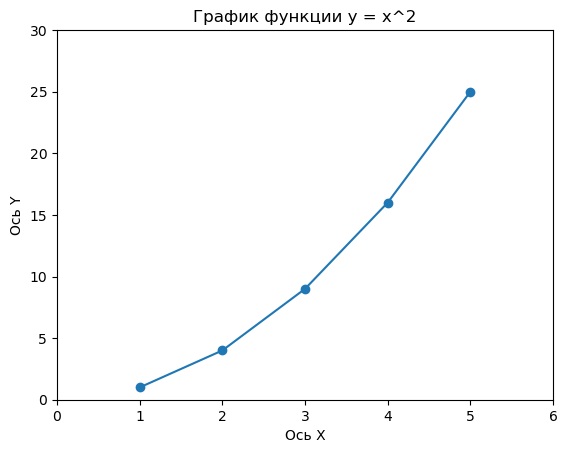

In [ ]:
import matplotlib.pyplot as plt

x_list = [1, 2, 3, 4, 5]
y_list = [1, 4, 9, 16, 25]

plt.plot(x_list, y_list, marker='o')

plt.xlim(0, 6)
plt.ylim(0, 30)

plt.xlabel('Ось X')
plt.ylabel('Ось Y')

plt.title('График функции y = x^2')

plt.show()

#### 4. Пример построения графика в полярной системе координат:

Для построения графика в полярной системе координат также используется библиотека `matplotlib`. Пример:

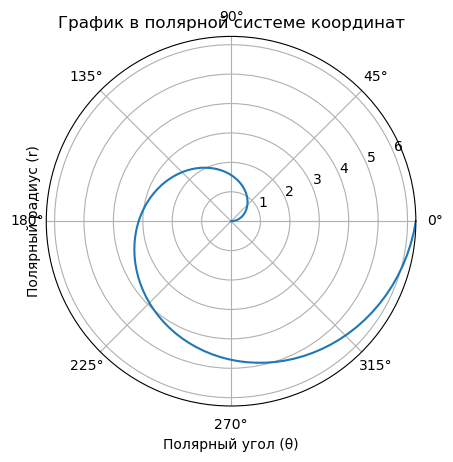

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2 * np.pi, 100)

r = theta

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)

ax.set_rmax(2 * np.pi)

ax.set_xlabel('Полярный угол (θ)')
ax.set_ylabel('Полярный радиус (r)')

ax.set_title('График в полярной системе координат')

plt.show()

В этом примере:

- `theta` — массив углов от `0` до `2π`.

- `r` — массив радиусов, который зависит от угла (например, спираль).

- `projection='polar'` указывает, что график строится в полярной системе координат.